In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
FunctionTransformer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import chi2

# Chi-square test for categorical vs target
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency #scientific python
import math
from sklearn.model_selection import train_test_split

In [26]:
data = pd.read_csv("CreditCard2.csv")

In [27]:
data.shape

(284807, 31)

In [28]:
data['Class'].value_counts()


,count
Class,
0,284315
1,492


<Axes: xlabel='Class'>

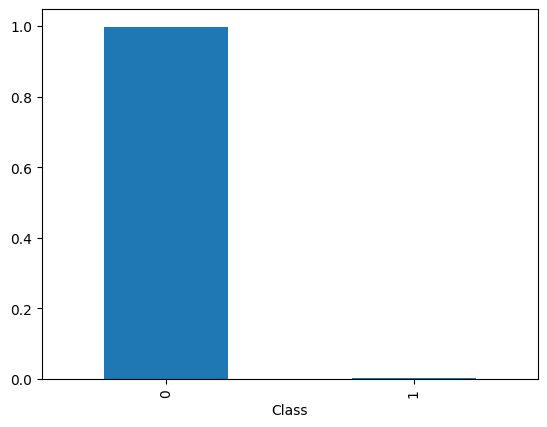

In [29]:
data['Class'].value_counts(normalize = True).plot(kind = 'bar')

<Axes: xlabel='Amount', ylabel='Class'>

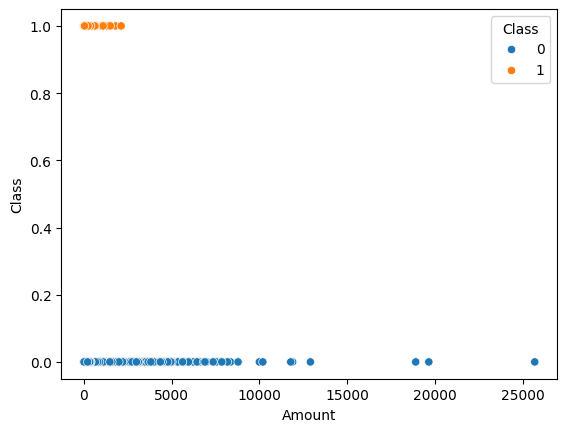

In [30]:
sns.scatterplot(x = 'Amount', y = 'Class', hue = 'Class', data = data)

In [31]:
X = data.drop(columns = 'Class')
y = data['Class']

In [ ]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
data.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [33]:

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = .2, random_state = 42)

In [ ]:
data['Class'].value_counts(normalize=True),train_y.value_counts(normalize=True), test_y.value_counts(normalize=True)

(Class
 0    0.998273
 1    0.001727
 Name: proportion, dtype: float64,
 Class
 0    0.998271
 1    0.001729
 Name: proportion, dtype: float64,
 Class
 0    0.99828
 1    0.00172
 Name: proportion, dtype: float64)

In [34]:
model_unbalanced = LogisticRegression(max_iter=1000)
model_unbalanced.fit(train_X, train_y)

LogisticRegression(max_iter=1000)

In [35]:
train_pred = model_unbalanced.predict(train_X)
test_pred = model_unbalanced.predict(test_X)

In [36]:
accuracy_score(train_y, train_pred), accuracy_score(test_y, test_pred)

(0.999161710812175, 0.9989466661985184)

In [37]:
confusion_matrix(train_y, train_pred)

array([[227416,     35],
       [   156,    238]])

In [38]:
confusion_matrix(test_y, test_pred)

array([[56854,    10],
       [   50,    48]])

In [39]:
data['Class'].value_counts(),train_y.value_counts(), test_y.value_counts()

(Class
 0    284315
 1       492
 Name: count, dtype: int64,
 Class
 0    227451
 1       394
 Name: count, dtype: int64,
 Class
 0    56864
 1       98
 Name: count, dtype: int64)

In [40]:
print(f"Train classification Report ---", classification_report(train_y, train_pred))
print(f"Test classification Report ---", classification_report(test_y, test_pred))

Train classification Report ---               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.87      0.60      0.71       394

    accuracy                           1.00    227845
   macro avg       0.94      0.80      0.86    227845
weighted avg       1.00      1.00      1.00    227845

Test classification Report ---               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.49      0.62        98

    accuracy                           1.00     56962
   macro avg       0.91      0.74      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [42]:
from sklearn.metrics import roc_auc_score

In [43]:
roc_auc_score(train_y, train_pred), roc_auc_score(test_y, test_pred)

(np.float64(0.8019535172042521), np.float64(0.744810030089695))

In [59]:
#To plot roc curve finding the probability. This method will give probability of both 0 and 1.
#We are taking probability of being 1
test_y_probability = model_unbalanced.predict_proba(test_X)[:,1]

In [47]:
test_y_probability

array([9.99997290e-01, 1.10927573e-04, 1.80472879e-04, ...,
       8.02084483e-03, 6.24294490e-05, 2.93111280e-04])

In [53]:
print(f"{model_unbalanced.predict_proba(test_X)[:,0]}")

[2.71022350e-06 9.99889072e-01 9.99819527e-01 ... 9.91979155e-01
 9.99937571e-01 9.99706889e-01]


length of fpr: 210 
length of tpr: 210
length of thresholds: 210
roc_auc: 0.960846610028367


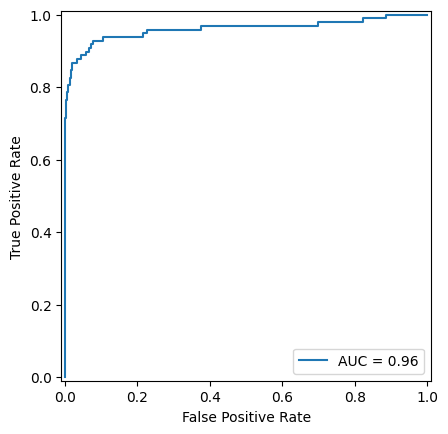

In [65]:
# Drawing ROC curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_y, test_y_probability)
print(f"length of fpr: {len(fpr)} ")
print(f"length of tpr: {len(tpr)}")
print(f"length of thresholds: {len(thresholds)}")
#print(f"thresholds: {thresholds}")
roc_auc = metrics.auc(fpr, tpr)
print(f"roc_auc: {roc_auc}")
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

Metrics calculated for various thresholds.


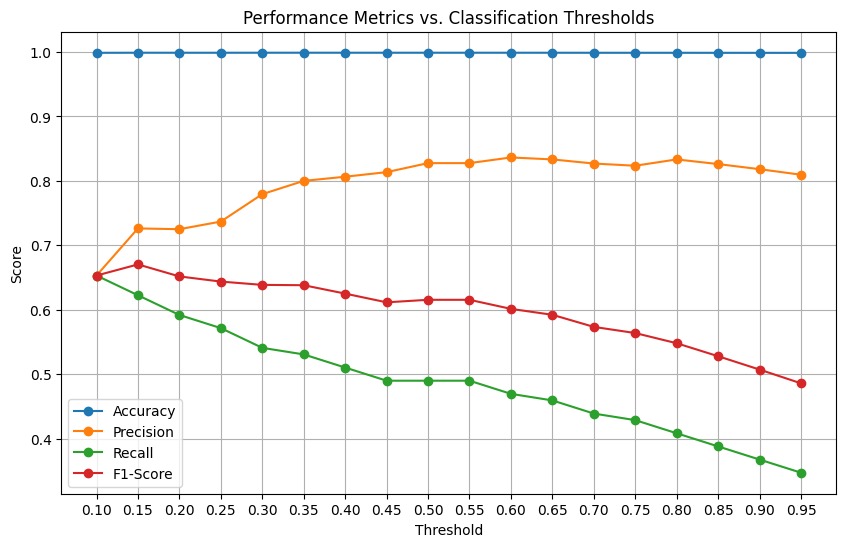

Plotting of performance metrics against classification thresholds is complete.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Generate a range of classification thresholds
thresholds = np.arange(0.1, 1.0, 0.05)

# Get predicted probabilities for the test set
y_pred_proba = model_unbalanced.predict_proba(test_X)[:, 1]

# Initialize lists to store metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
# Iterate through each threshold and calculate metrics
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)

    accuracy_scores.append(accuracy_score(test_y, y_pred_threshold))
    precision_scores.append(precision_score(test_y, y_pred_threshold, zero_division=0))
    recall_scores.append(recall_score(test_y, y_pred_threshold, zero_division=0))
    f1_scores.append(f1_score(test_y, y_pred_threshold, zero_division=0))
print("Metrics calculated for various thresholds.")

plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_scores, label='Accuracy', marker='o')
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='o')

plt.title('Performance Metrics vs. Classification Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.xticks(thresholds)
plt.grid(True)
plt.legend()
plt.show()

print('Plotting of performance metrics against classification thresholds is complete.')

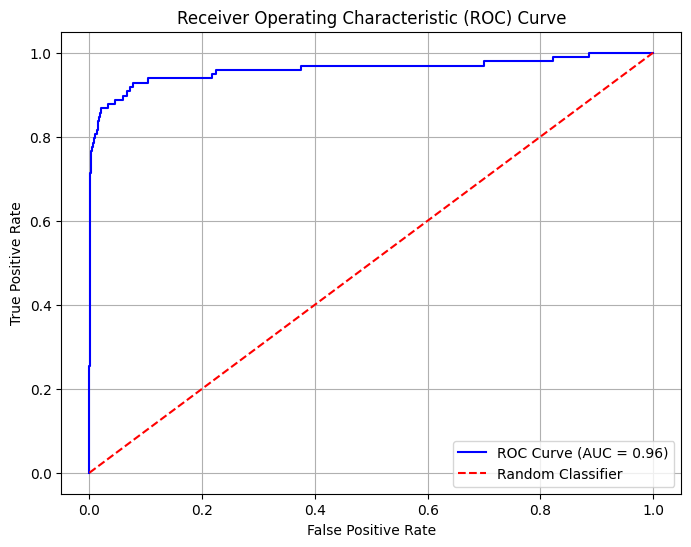

AUC Score: 0.96


In [ ]:
#ROC Curve code snippet:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
y_pred_proba = model_unbalanced.predict_proba(test_X)[:, 1]
# Calculate FPR and TPR for the ROC curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(test_y, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()
auc_score = roc_auc_score(test_y, y_pred_proba)
print(f"AUC Score: {auc_score:.2f}")

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: >

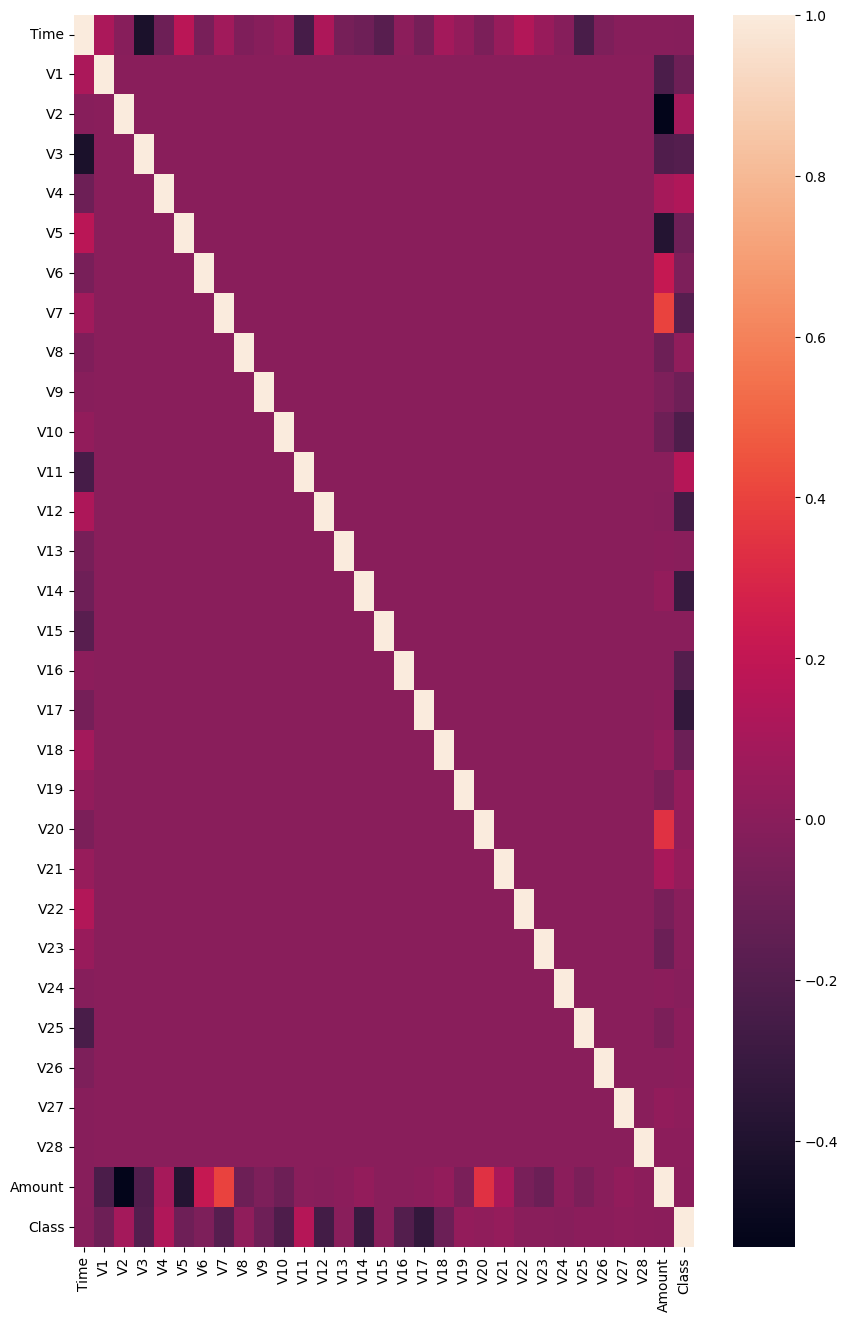

In [68]:
plt.figure(figsize=(10, 16))
sns.heatmap(data.corr())

In [75]:
#No much coreelation so doing scaling
scale = StandardScaler()
train_scaled_X = pd.DataFrame(scale.fit_transform(train_X), columns=train_X.columns)
test_scaled_X = pd.DataFrame(scale.transform(test_X), columns= test_X.columns)

#Under Sampling from the scaled data

In [73]:
from imblearn.under_sampling import RandomUnderSampler

In [74]:
undersampler = RandomUnderSampler()

In [111]:
# Sampling only for train dataset
train_scaled_undersampled_X, train_scaled_undersampled_y = undersampler.fit_resample(train_scaled_X,train_y)

In [112]:
train_scaled_undersampled_y.value_counts()

,count
Class,
0,394
1,394


In [113]:
# Due to undersampling, 227845(both 0 and 1 - count is 394) so data is converted into 788 bcoz of
#  394 - 0 count only added to this

train_scaled_undersampled_X.shape

(788, 30)

In [114]:
train_scaled_X.shape

(227845, 30)

In [115]:

train_y.value_counts()

,count
Class,
0,227451
1,394


In [116]:
# Concatenating X and y to geta  full dataset to see correlation after under sampling
train_scaled_undersample = pd.concat([train_scaled_undersampled_X, train_scaled_undersampled_y ], axis = 1)

<Axes: >

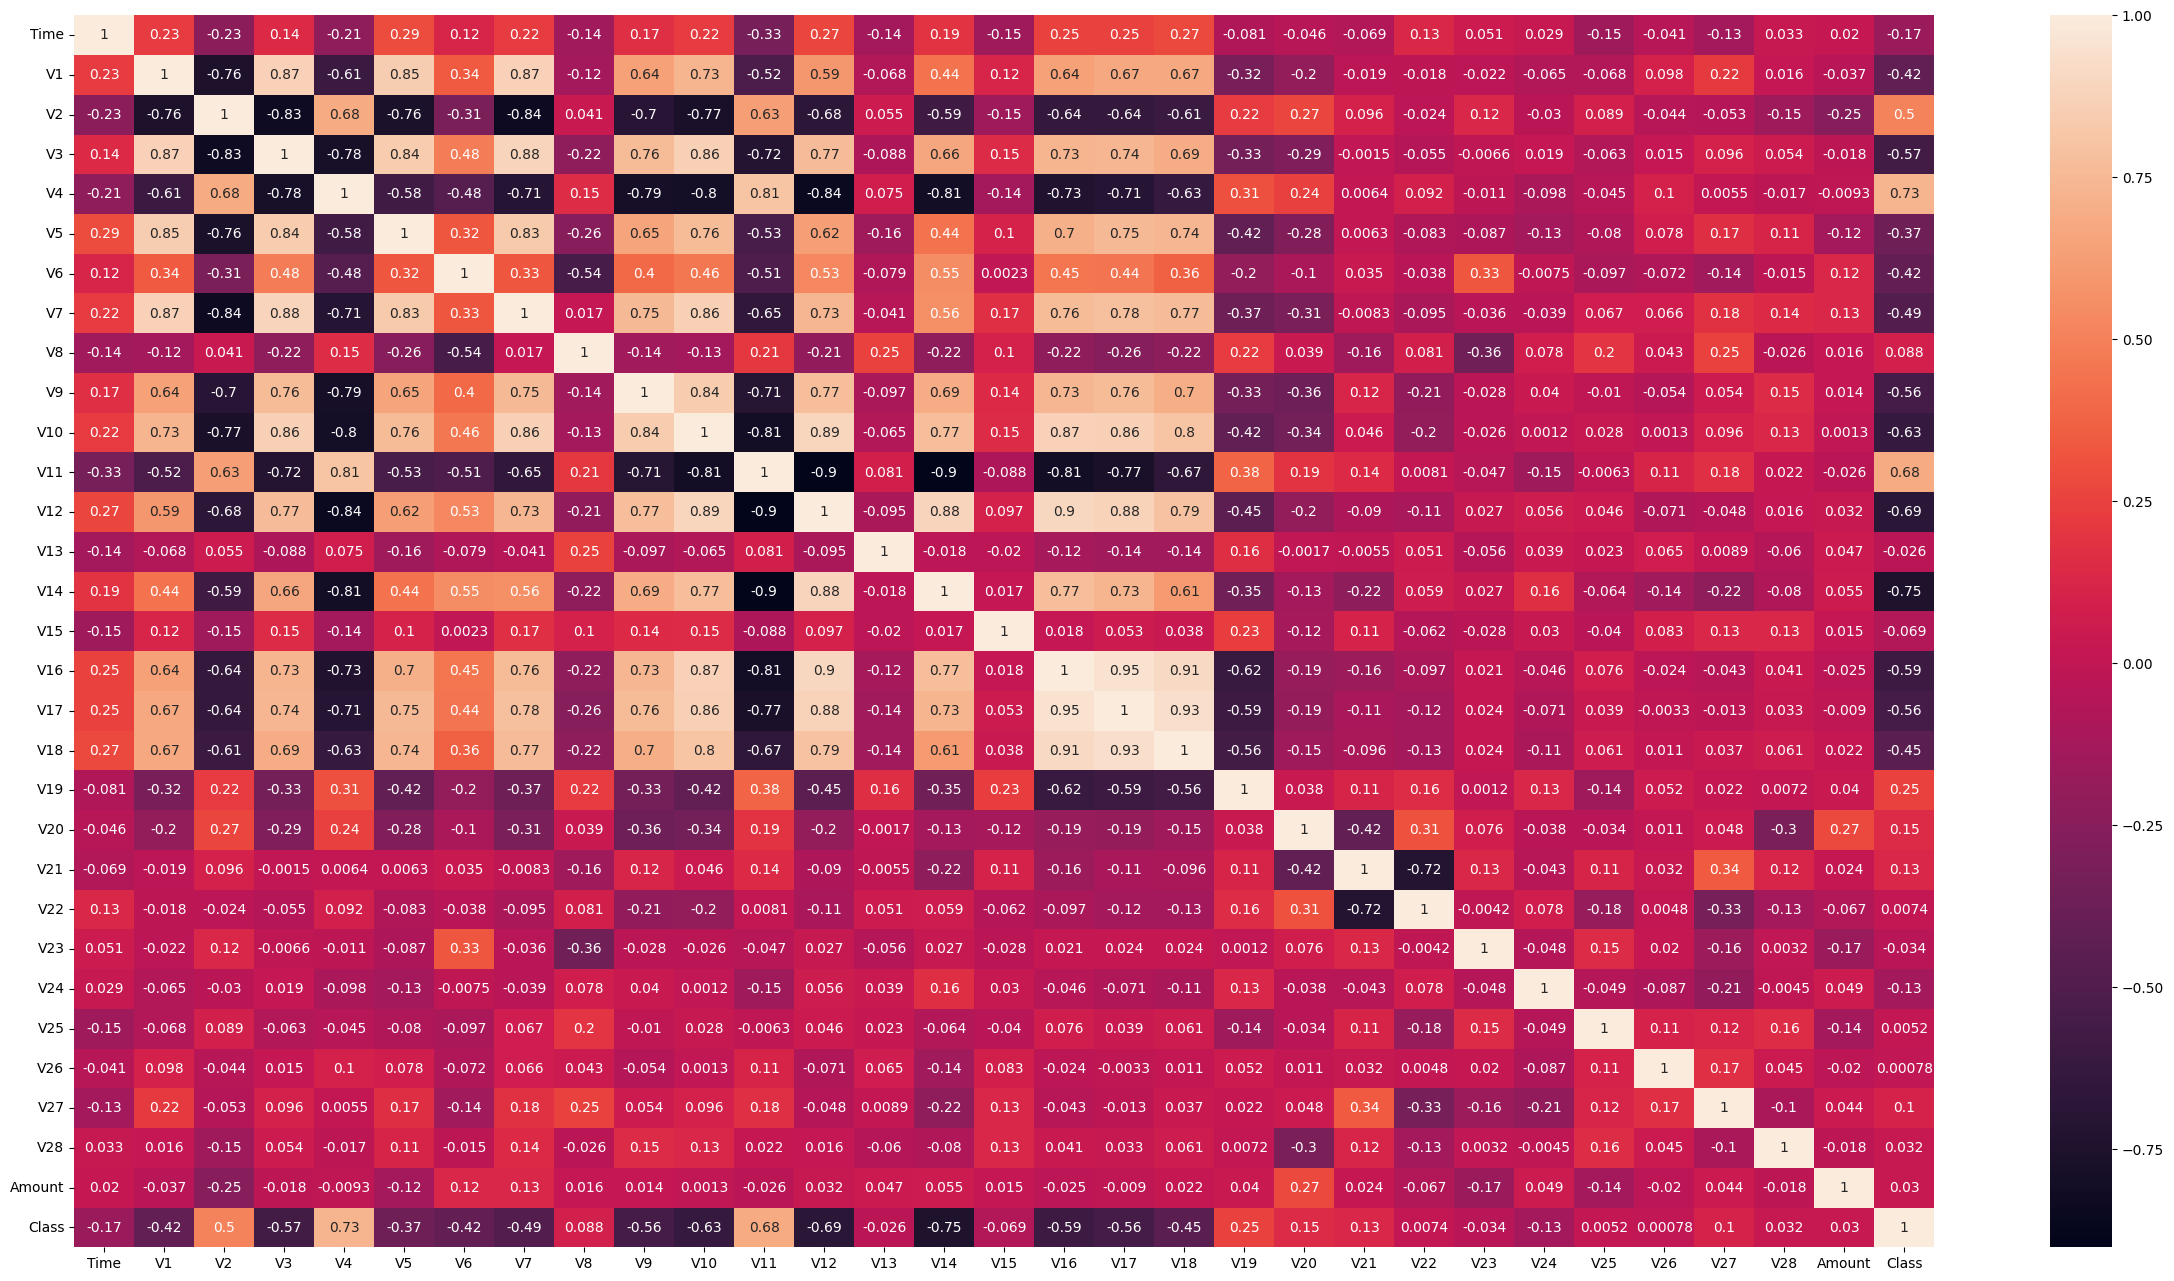

In [117]:

plt.figure(figsize=(30, 16))
sns.heatmap(train_scaled_undersample.corr(), annot = True)

<Axes: xlabel='Class'>

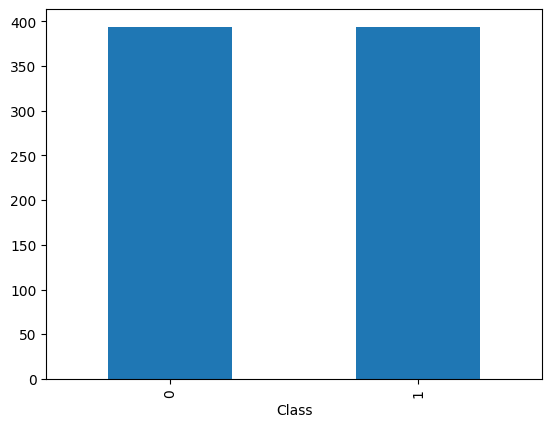

In [118]:
train_scaled_undersample['Class'].value_counts().plot(kind = 'bar')

In [119]:
#Building a modeal using scaled data
model_balanced_scaled = LogisticRegression()
model_balanced_scaled.fit(train_scaled_undersampled_X, train_scaled_undersampled_y)

LogisticRegression()

In [120]:
train_pred = model_balanced_scaled.predict(train_scaled_undersampled_X)
test_pred = model_balanced_scaled.predict(test_scaled_X)

In [122]:
print(f"Train Accuracy Score : {accuracy_score(train_scaled_undersampled_y, train_pred)}")
print(f"Test Accuracy Score : {accuracy_score(test_y, test_pred)}")

Train Accuracy Score : 0.9530456852791879
Test Accuracy Score : 0.9601664267406341


In [124]:
print(f"Train Confusion Matrix: {confusion_matrix(train_scaled_undersampled_y, train_pred)}")
print(f"Test Confusion Matrix: {confusion_matrix(test_y,test_pred)}")

Train Confusion Matrix: [[387   7]
 [ 30 364]]
Test Confusion Matrix: [[54602  2262]
 [    7    91]]


In [128]:
#comparison between original dataset, undescaling train dataset, test dataset
data['Class'].value_counts(),train_scaled_undersampled_y.value_counts(), test_y.value_counts()

(Class
 0    284315
 1       492
 Name: count, dtype: int64,
 Class
 0    394
 1    394
 Name: count, dtype: int64,
 Class
 0    56864
 1       98
 Name: count, dtype: int64)

In [132]:
print(f"Train Classification Report: \n {classification_report(train_scaled_undersampled_y, train_pred)}")
print(f"Test Classification Report: \n {classification_report(test_y,test_pred)}")

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       394
           1       0.98      0.92      0.95       394

    accuracy                           0.95       788
   macro avg       0.95      0.95      0.95       788
weighted avg       0.95      0.95      0.95       788

Test Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.93      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [134]:
print(f"Train ROC AUC Score: {roc_auc_score(train_scaled_undersampled_y, train_pred)}")
print(f"Test ROC AUC Score: {roc_auc_score(test_y,test_pred)}")

Train ROC AUC Score: 0.9530456852791878
Test ROC AUC Score: 0.9443961532277514


In [138]:
#To draw a ROC curve - we are taking the test split dataset
test_y_probability = model_balanced_scaled.predict_proba(test_scaled_X)[:,1]


In [140]:
test_y_probability

array([1.        , 0.02598644, 0.0429539 , ..., 0.23025157, 0.01594309,
       0.96536876])

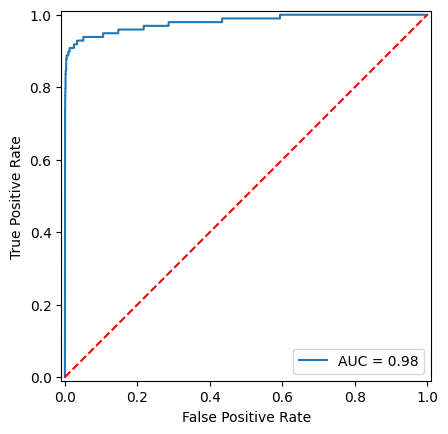

In [143]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
#roc_curve requires original y value and the probability then only it can find fpr, tpr
fpr, tpr, thresholds = metrics.roc_curve(test_y, test_y_probability)

#finind auc score using fpr and tpr
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.show()

# Plotting grpah to visualize all the scores/metrics against each threshold to find the best threhsold


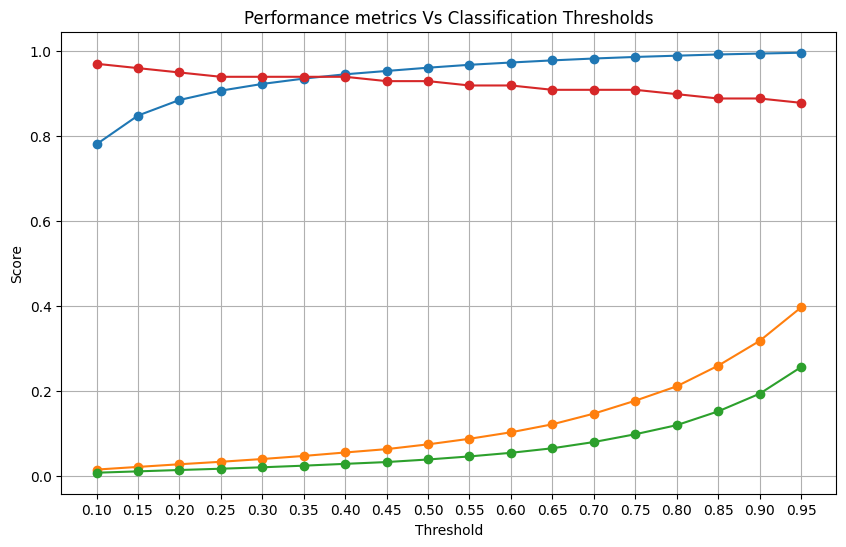

In [150]:
from sklearn.metrics import precision_score, f1_score, recall_score
# Generate a range of thresholds
thresholds = np.arange(0.1, 1.0, 0.05)

#Get predicted probabilities for the test set - already found
#test_y_probability
#Initialize list for all the scores
accuracy_scores = [];
f1scores = []
precision_scores = []
recall_scores = []

# Iterate through each threshold and calculate the score
for threshold in thresholds:
  y_pred_threshold = (test_y_probability >= threshold).astype(int)
  accuracy_scores.append(accuracy_score(test_y,y_pred_threshold))
  f1scores.append(f1_score(test_y,y_pred_threshold, zero_division=0))
  precision_scores.append(precision_score(test_y,y_pred_threshold, zero_division=0))
  recall_scores.append(recall_score(test_y, y_pred_threshold, zero_division=0))
plt.figure(figsize=(10,6))
plt.plot(thresholds, accuracy_scores, label="Accuracy", marker="o")
plt.plot(thresholds, f1scores, label="F1 Score", marker="o")
plt.plot(thresholds, precision_scores, label="Precision", marker="o")
plt.plot(thresholds, recall_scores, label="Recall", marker="o")
plt.title("Performance metrics Vs Classification Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.grid(True)
plt.xticks(thresholds)
plt.show()


#Identified teh best threshold as 0.875 which is good for Recall and ok precision

In [152]:
tuned_test_pred__y = np.where(test_y_probability>0.875,1,0)

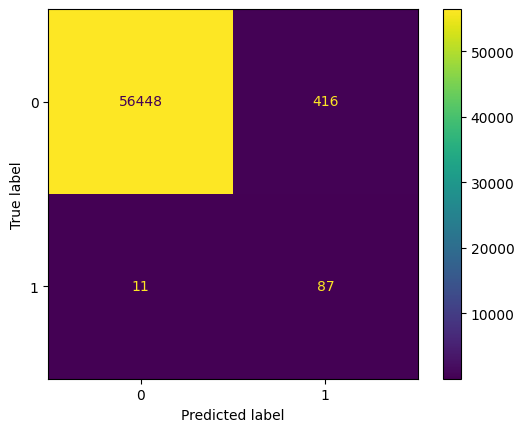

In [155]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix(test_y, tuned_test_pred__y))
display.plot()

In [158]:

TP_ = []
TN_ = []
FP_ = []
FN_ = []
res = []
for i in np.linspace(0,1,20):
  tuned_test_pred__y = np.where(test_y_probability>i,1,0)
  conf_matrix = confusion_matrix(test_y, tuned_test_pred__y)
  TP = conf_matrix[1][1]
  TN = conf_matrix[0][0]
  FP = conf_matrix[0][1]
  FN = conf_matrix[1][0]
  TP_.append(TP)
  TN_.append(TN)
  FP_.append(FP)
  FN_.append(FN)
  res.append([i,TP,FP,FN,TN])
  print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

TP: 98, TN: 0, FP: 56864, FN: 0
TP: 96, TN: 36998, FP: 19866, FN: 2
TP: 94, TN: 44861, FP: 12003, FN: 4
TP: 93, TN: 48577, FP: 8287, FN: 5
TP: 93, TN: 50568, FP: 6296, FN: 5
TP: 92, TN: 51780, FP: 5084, FN: 6
TP: 92, TN: 52670, FP: 4194, FN: 6
TP: 92, TN: 53381, FP: 3483, FN: 6
TP: 92, TN: 53942, FP: 2922, FN: 6
TP: 91, TN: 54380, FP: 2484, FN: 7
TP: 91, TN: 54815, FP: 2049, FN: 7
TP: 90, TN: 55172, FP: 1692, FN: 8
TP: 89, TN: 55485, FP: 1379, FN: 9
TP: 89, TN: 55773, FP: 1091, FN: 9
TP: 89, TN: 56002, FP: 862, FN: 9
TP: 88, TN: 56177, FP: 687, FN: 10
TP: 87, TN: 56355, FP: 509, FN: 11
TP: 87, TN: 56487, FP: 377, FN: 11
TP: 86, TN: 56607, FP: 257, FN: 12
TP: 0, TN: 56864, FP: 0, FN: 98


In [159]:

pd.DataFrame(res, columns=['Threshold','TP','FP','FN','TN'])

,Threshold,TP,FP,FN,TN
0,0.000000,98,56864,0,0
1,0.052632,96,19866,2,36998
2,0.105263,94,12003,4,44861
3,0.157895,93,8287,5,48577
4,0.210526,93,6296,5,50568
5,0.263158,92,5084,6,51780
6,0.315789,92,4194,6,52670
7,0.368421,92,3483,6,53381
8,0.421053,92,2922,6,53942
9,0.473684,91,2484,7,54380
